In [1]:
# Library Inports

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error
from warnings import simplefilter
simplefilter(action='ignore')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
%matplotlib inline


2023-12-09 21:27:06.207242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# CNN for MIT-BIH Arrhythmia Dataset

mit_train_data = pd.read_csv("mitbih_train.csv", header = None)
mit_test_data = pd.read_csv("mitbih_test.csv", header = None)

train_data = mit_train_data.copy()
test_data = mit_test_data.copy()

In [3]:
# Print some data for train dataset

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Print some data for test dataset

test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Get infr for the data frame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [6]:
# Describe the data frame
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [7]:
train_data.shape

(87554, 188)

In [8]:
# convert target values to integers
train_data[187]=train_data[187].astype(int)

In [9]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
## Pre - Processing of dataset      ======================================================================

In [11]:
train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [12]:
# count the number of NaN values in each column

train_data.fillna(train_data.mean(), inplace=True)

print(train_data.isnull().sum())

train_data.head()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
# count the number of NaN values in each column

test_data.fillna(test_data.mean(), inplace=True)
print(test_data.isnull().sum())
test_data.head()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


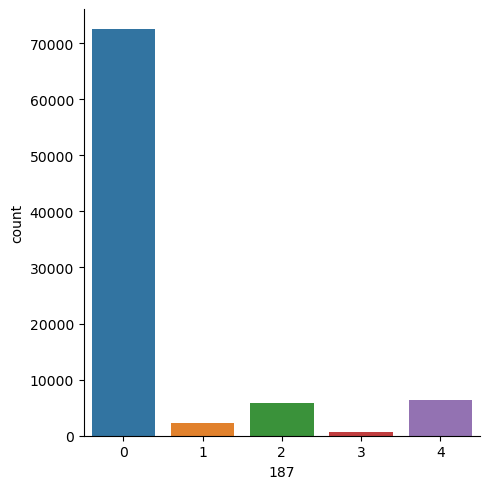

In [14]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data

sns.catplot(x = 187, kind = 'count', data = train_data)

In [15]:
class_0=train_data[train_data[187]==0.0]
class_1=train_data[train_data[187]==1.0]
class_2=train_data[train_data[187]==2.0]
class_3=train_data[train_data[187]==3.0]
class_4=train_data[train_data[187]==4.0]
train_data = pd.concat([class_1, class_2, class_3, class_4, class_0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


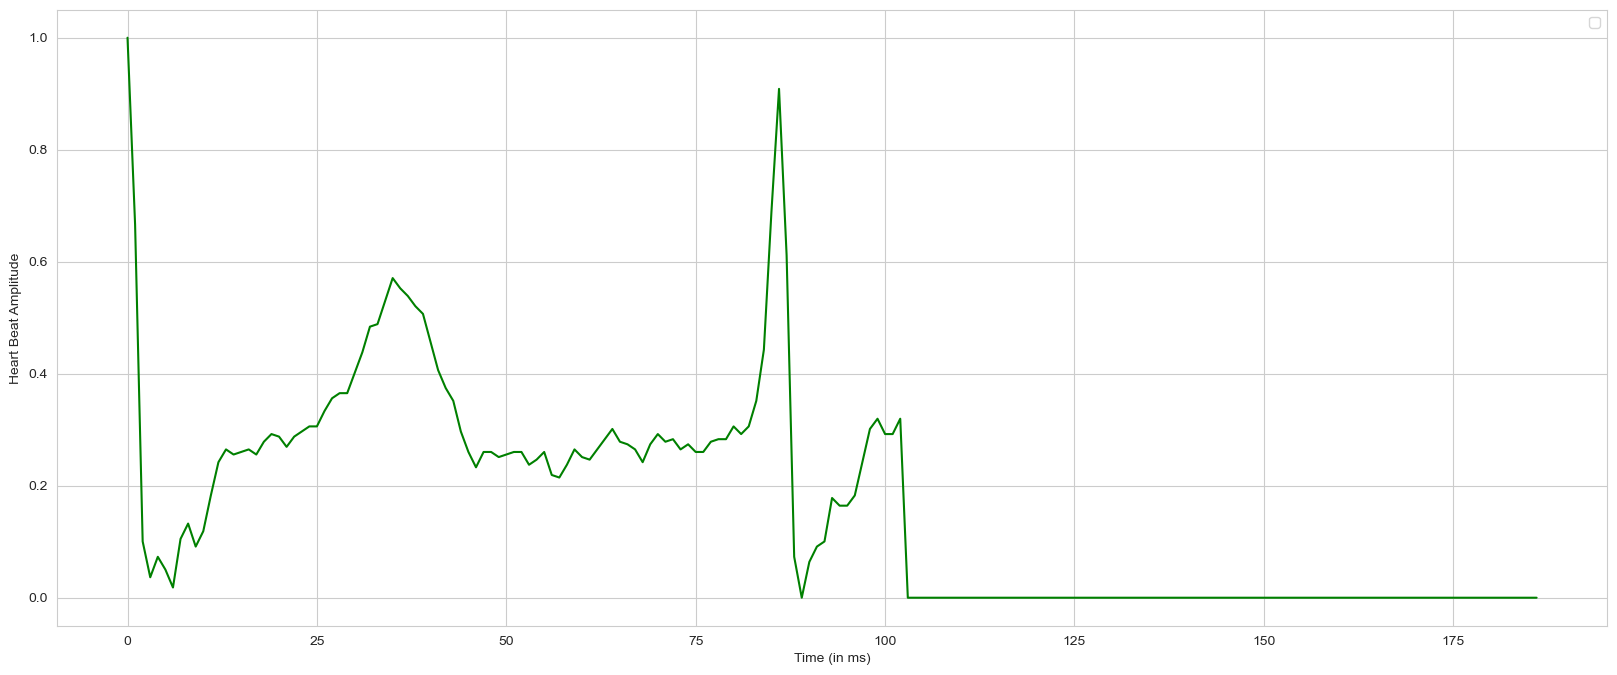

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'green')
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

In [17]:
# Resampling

df_1=train_data[train_data[187]==1]
df_2=train_data[train_data[187]==2]
df_3=train_data[train_data[187]==3]
df_4=train_data[train_data[187]==4]
df_0=(train_data[train_data[187]==0]).sample(n=15000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=15000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=15000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=15000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=15000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


df_11=test_data[test_data[187]==1]
df_22=test_data[test_data[187]==2]
df_33=test_data[test_data[187]==3]
df_44=test_data[test_data[187]==4]
df_00=(test_data[test_data[187]==0]).sample(n=15000,random_state=42)

df_11_upsample=resample(df_11,replace=True,n_samples=15000,random_state=123)
df_22_upsample=resample(df_22,replace=True,n_samples=15000,random_state=124)
df_33_upsample=resample(df_33,replace=True,n_samples=15000,random_state=125)
df_44_upsample=resample(df_44,replace=True,n_samples=15000,random_state=126)

test_df=pd.concat([df_00,df_11_upsample,df_22_upsample,df_33_upsample,df_44_upsample])


equilibre=train_df[187].value_counts()
print(equilibre)

0    15000
1    15000
2    15000
3    15000
4    15000
Name: 187, dtype: int64


In [18]:
print("ALL Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

print("ALL Balanced Train data")
print("Type\tCount")
print((train_df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((test_df[187]).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Balanced Train data
Type	Count
0    15000
1    15000
2    15000
3    15000
4    15000
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
0.0    15000
1.0    15000
2.0    15000
3.0    15000
4.0    15000
Name: 187, dtype: int64


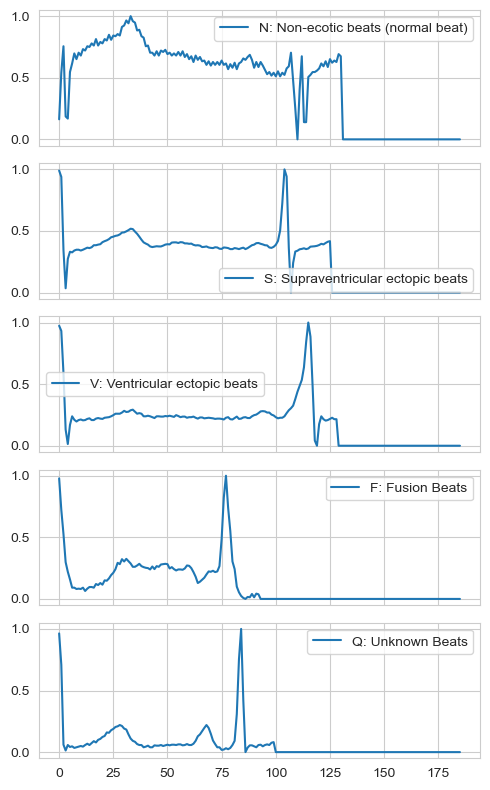

In [19]:
classes = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
class_descriptions = {
    'N': 'Non-ecotic beats (normal beat)',
    'S': 'Supraventricular ectopic beats',
    'V': 'Ventricular ectopic beats',
    'F': 'Fusion Beats',
    'Q': 'Unknown Beats'
}

fig, axs = plt.subplots(5, 1, figsize=(5, 8), sharex=True)

for i in range(5):
    axs[i].plot(train_df.iloc[i, :186], 
                label=f"{classes[i]}: {class_descriptions[classes[i]]}")
    axs[i].legend()

plt.tight_layout()

plt.show()

In [20]:
test = test_df.iloc[0,0:len(test_df.T)-1] # Remove last line cause it might be a Nan
test = pd.DataFrame(test)

# NORMALIZING TEST DATA AMPLITUDE
# load the dataset and print the first 5 rows
# prepare data for normalization

values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized)
normalized

,0
0,0.967089
1,0.686076
2,0.230380
3,0.053165
4,0.083544
...,...
182,0.000000
183,0.000000
184,0.000000
185,0.000000


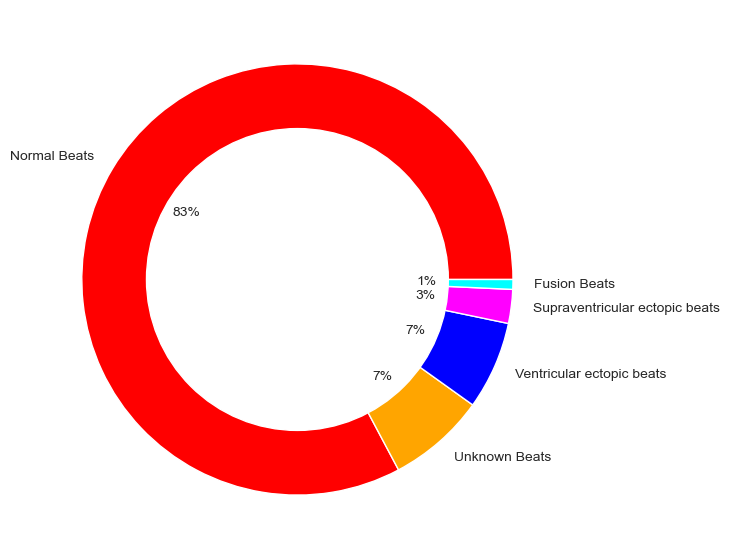

In [21]:
# Plotting the types of hearbeats before resampling

plt.figure(figsize= (7,7))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


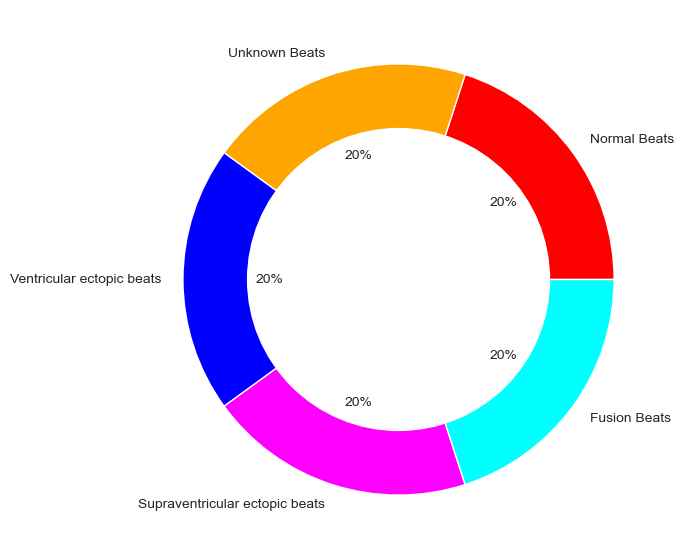

In [22]:
# Plotting the types of hearbeats after resampling

plt.figure(figsize= (7,7))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [23]:
# Data Normalization

print("--- X ---")
X_train_1 = train_df.loc[:, train_df.columns != 187]
print(X_train_1.head())
print(X_train_1.info())

print("--- Y ---")
y_train_1 = train_df.loc[:, train_df.columns == 187]
y_train_n = to_categorical(y_train_1)

print("--- test X ---")
X_test_1 = test_df.loc[:, test_df.columns != 187]
print(X_test_1.head())
print(X_test_1.info())

print("--- test y ---")
y_test_1 = test_df.loc[:, test_df.columns == 187]
y_test_n = to_categorical(y_test_1)

--- X ---
            0         1         2         3         4         5         6    \
10153  0.162791  0.540698  0.755814  0.186047  0.168605  0.546512  0.616279   
33886  0.990066  0.938742  0.344371  0.034768  0.273179  0.331126  0.326159   
32005  0.974239  0.932084  0.590164  0.131148  0.014052  0.168618  0.238876   
56159  0.978495  0.723118  0.526882  0.298387  0.220430  0.158602  0.091398   
61783  0.963351  0.709424  0.060209  0.013089  0.057592  0.041885  0.047120   

            7         8         9    ...  177  178  179  180  181  182  183  \
10153  0.697674  0.651163  0.703488  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33886  0.341060  0.347682  0.347682  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32005  0.210773  0.196721  0.208431  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
56159  0.091398  0.080645  0.083333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
61783  0.034031  0.039267  0.044503  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
10153  0.0  0.0  

In [24]:
# Comparing ML Models

test_scores_models = [] 

start = time.time()

# LR
lr = LogisticRegression(max_iter=100, random_state=42).fit(X_train_1, y_train_1)
print("------------------------LOGISTIC REGRESSION MODEL--------------------------------\n")   
print('Accuracy of Logistic Regression is', lr.score(X_test_1, y_test_1))
end = time.time()    
test_scores_models.append(lr.score(X_test_1, y_test_1))
print(f'Logistic Regression took {end-start} seconds to run\n')

# DECISION TREE

print("------------------------DECISION TREE MODEL------------------------\n")
start = time.time()
dt = DecisionTreeClassifier(max_depth = 50).fit(X_train_1, y_train_n)
print('Accuracy of Decision Tree is', dt.score(X_test_1, y_test_n))
end = time.time()    
test_scores_models.append(dt.score(X_test_1, y_test_n))

print(f'Decision Tree took {end-start} seconds to run\n')

# CNN

print("------------------------Convolutional Nural Network------------------------")
start = time.time()

# Define the Sequential model
model = Sequential()

# Add the first convolutional layer with 50 filters, kernel size 3, ReLU activation, and input shape of (187, 1)
model.add(Conv1D(50, kernel_size=3, activation='relu', input_shape=(187, 1)))

# Add the second convolutional layer with 50 filters and ReLU activation
model.add(Conv1D(50, kernel_size=2, activation='relu'))

# Flatten the output before connecting to dense layers
model.add(Flatten())

# Add a dense layer with 5 neurons (assuming classification) and softmax activation
model.add(Dense(5, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy as a metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data for 10 epochs
history = model.fit(X_train_1, y_train_n, epochs=10, batch_size= 50)

# Evaluate the model on the test data
print("Evaluation: ")
mse, acc = model.evaluate(X_test_1, y_test_n)

print()
print("------------------------CNN------------------------")  
print('CNN mean squared error :', mse)
print('CNN model accuracy:', acc)
end = time.time()    
test_scores_models.append(acc)

print(f'CNN Model took {end-start} seconds to run\n')

------------------------LOGISTIC REGRESSION MODEL--------------------------------

Accuracy of Logistic Regression is 0.7605866666666666
Logistic Regression took 4.441962003707886 seconds to run

------------------------DECISION TREE MODEL------------------------

Accuracy of Decision Tree is 0.8502133333333334
Decision Tree took 17.001497268676758 seconds to run

------------------------Convolutional Nural Network------------------------
Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4780 - accuracy: 0.8230
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2991 - accuracy: 0.8922
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2418 - accuracy: 0.9140
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1996 - accuracy: 0.9298
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1692 - accuracy: 0.9414
Epoch 6/10
1500/1500 [====================

dict_keys(['loss', 'accuracy'])


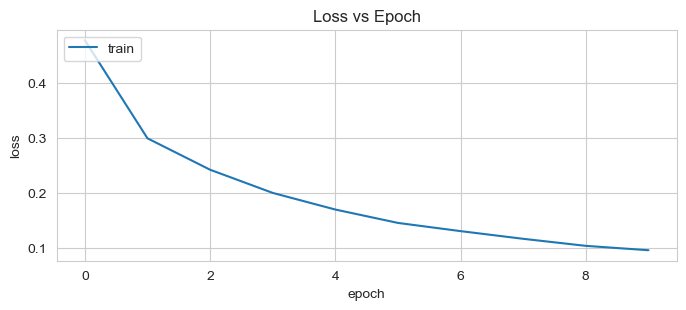

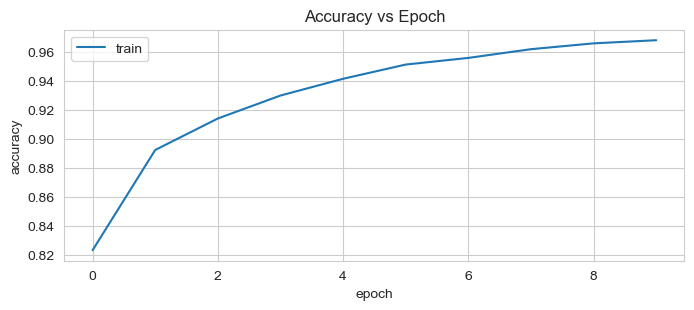

In [26]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'])

plt.title('Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [29]:
# K- Nearest Neighbours Algorithm

# define features and target
X = train_data.iloc[:, train_data.columns != 187]
y = train_data.iloc[:, train_data.columns == 187]

In [30]:
# Let's try splitting the training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale values
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# KNN
print("------------------------k-NN MODEL------------------------\n")
start = time.time()
knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)
print('Accuracy of KNN is', knn.score(X_test, y_test))
end = time.time()
test_scores_models.append(knn.score(X_test, y_test))

print(f'KNN took {end-start} seconds to run\n')

------------------------k-NN MODEL------------------------

Accuracy of KNN is 0.9660213580035406
KNN took 4.916800022125244 seconds to run



 ========== Confusion Matrix for Logistic Regression Model ==========

              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61     15000
         1.0       0.80      0.67      0.73     15000
         2.0       0.71      0.72      0.71     15000
         3.0       0.78      0.88      0.83     15000
         4.0       0.93      0.91      0.92     15000

    accuracy                           0.76     75000
   macro avg       0.76      0.76      0.76     75000
weighted avg       0.76      0.76      0.76     75000



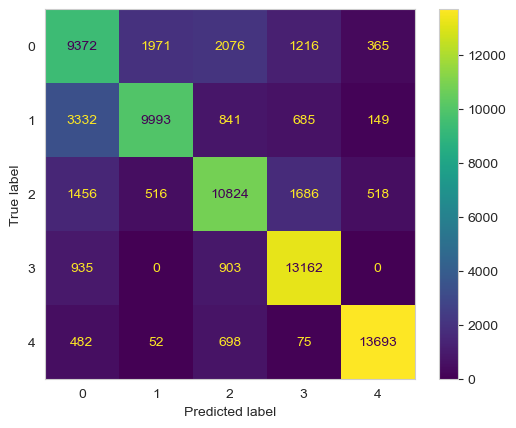

In [32]:
y_pred_lr = lr.predict(X_test_1)

print(" ========== Confusion Matrix for Logistic Regression Model ==========\n")
print(classification_report(y_test_1, y_pred_lr))
 
cm = confusion_matrix(y_test_1, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

 ========== Confusion Matrix for Decision Tree Model ==========

              precision    recall  f1-score   support

           0       0.69      0.93      0.79     15000
           1       0.94      0.75      0.84     15000
           2       0.82      0.88      0.85     15000
           3       0.95      0.74      0.83     15000
           4       0.95      0.94      0.95     15000

    accuracy                           0.85     75000
   macro avg       0.87      0.85      0.85     75000
weighted avg       0.87      0.85      0.85     75000



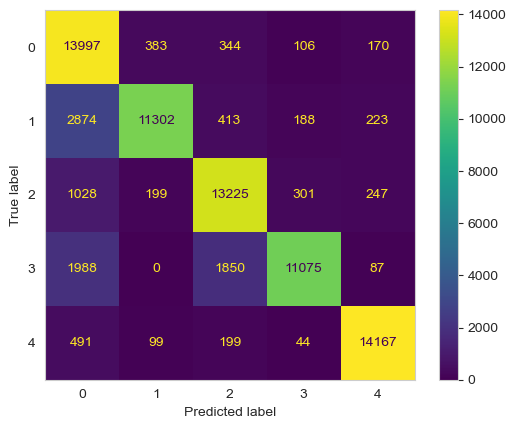

In [33]:
y_pred_dt = dt.predict(X_test_1)

print(" ========== Confusion Matrix for Decision Tree Model ==========\n")
print(classification_report(y_test_n.argmax(axis=1), y_pred_dt.argmax(axis=1)))
 
cm = confusion_matrix(y_test_n.argmax(axis=1), y_pred_dt.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

2344/2344 [==============================] - 4s 2ms/step
 ========== Confusion Matrix for CNN Model ==========

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     15000
           1       0.88      0.86      0.87     15000
           2       0.94      0.92      0.93     15000
           3       0.95      0.87      0.91     15000
           4       0.98      0.98      0.98     15000

    accuracy                           0.90     75000
   macro avg       0.91      0.90      0.90     75000
weighted avg       0.91      0.90      0.90     75000



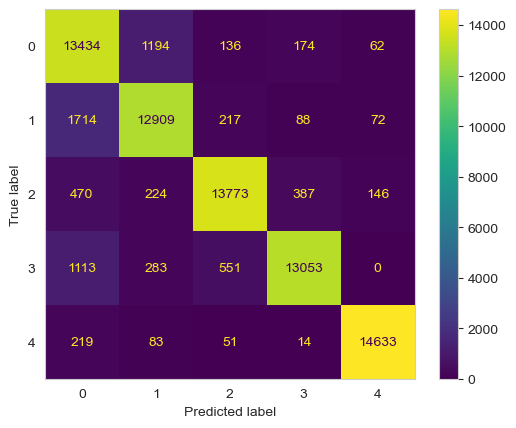

In [34]:
y_pred_cnn = model.predict(X_test_1)

print(" ========== Confusion Matrix for CNN Model ==========\n")
print(classification_report(y_test_n.argmax(axis=1), y_pred_cnn.argmax(axis=1)))
 
cm = confusion_matrix(y_test_n.argmax(axis=1), y_pred_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

 ========== Confusion Matrix for k-NN Model ==========

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14519
           1       0.92      0.66      0.77       430
           2       0.92      0.81      0.86      1139
           3       0.82      0.60      0.69       138
           4       0.98      0.93      0.96      1285

    accuracy                           0.97     17511
   macro avg       0.92      0.80      0.85     17511
weighted avg       0.97      0.97      0.96     17511



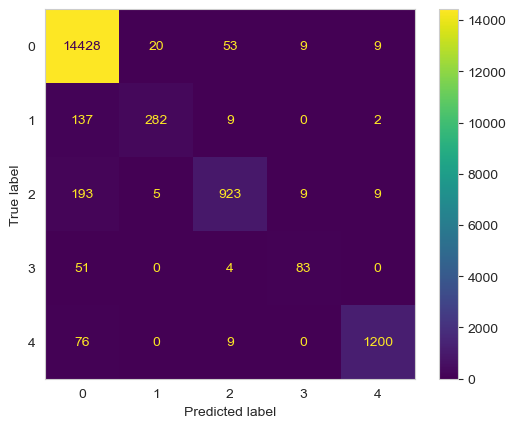

In [35]:
y_pred_knn = knn.predict(X_test)

print(" ========== Confusion Matrix for k-NN Model ==========\n")
print(classification_report(y_test, y_pred_knn))
 
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

In [36]:
test_scores_models_percentage = []
for accuracy in test_scores_models:
    test_scores_models_percentage.append(accuracy*100)

In [37]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, str(y[i])+"%", ha = 'center')

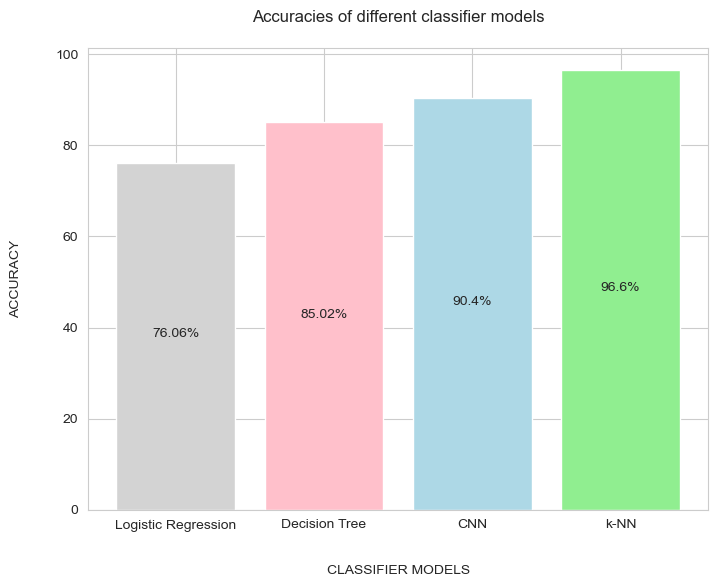

In [42]:
# Bar PLot

models = ['Logistic Regression', 'Decision Tree', 'CNN', 'k-NN']
acc_percentage_list = [float(str(format(test_scores_models_percentage[0], ".2f"))),float(str(format(test_scores_models_percentage[1], ".2f"))),float(str(format(test_scores_models_percentage[2], ".2f"))),float(str(format(test_scores_models_percentage[3], ".2f")))]

plt.subplots(figsize=(8,6))

color=['lightgrey', 'pink', 'lightblue', 'lightgreen']

plt.bar(models, test_scores_models_percentage, color=color)

addlabels(models, acc_percentage_list)

plt.ylabel('ACCURACY\n\n')
plt.xlabel('\n\nCLASSIFIER MODELS')
plt.title('Accuracies of different classifier models\n')
plt.show()

In [ ]:
#  ================ CODE END ================